In [20]:
import numpy as np
import pandas as pd

In [21]:
data = pd.read_csv('preparations/stroke_heart_cirrhosis_merged.csv')
data.columns

Index(['age', 'hypertension', 'heart_disease', 'ever_married', 'work_type',
       'avg_glucose_level', 'bmi', 'smoking_status', 'stroke', 'Sex',
       'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG',
       'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope', 'N_Days', 'Status',
       'Ascites', 'Hepatomegaly', 'Spiders', 'Edema', 'Bilirubin', 'Albumin',
       'Copper', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage'],
      dtype='object')

In [3]:
data.head()

,age,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,bmi,smoking_status,stroke,Sex,...,Spiders,Edema,Bilirubin,Albumin,Copper,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,67,0,1,1,3.0,228.69,36.600000,1,1,0,...,0.0,0,2.6,3.1,94.0,56.76,124.702128,214.0,11.0,4.0
1,67,0,1,1,3.0,144.10,27.600000,0,0,0,...,0.0,0,2.6,3.1,94.0,56.76,124.702128,214.0,11.0,4.0
2,67,1,1,1,3.0,254.63,31.000000,0,0,0,...,0.0,0,2.6,3.1,94.0,56.76,124.702128,214.0,11.0,4.0
3,67,0,1,1,2.0,95.88,31.900000,3,0,0,...,0.0,0,2.6,3.1,94.0,56.76,124.702128,214.0,11.0,4.0
4,67,0,1,1,3.0,97.24,28.893237,3,0,0,...,0.0,0,2.6,3.1,94.0,56.76,124.702128,214.0,11.0,4.0


In [22]:
data['Label'] = 0

for index, row in data.iterrows():
    
    count = 0
    if row['heart_disease'] == 1:
        count += 1
    if row['Stage'] in [3,4]:
        count += 1
    if row['stroke'] == 1:
        count += 1
        
    if count >= 2:
        data.at[index,'Label'] = 1

data.head()

,age,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,bmi,smoking_status,stroke,Sex,...,Edema,Bilirubin,Albumin,Copper,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Label
0,67,0,1,1,3.0,228.69,36.600000,1,1,0,...,0,2.6,3.1,94.0,56.76,124.702128,214.0,11.0,4.0,1
1,67,0,1,1,3.0,144.10,27.600000,0,0,0,...,0,2.6,3.1,94.0,56.76,124.702128,214.0,11.0,4.0,1
2,67,1,1,1,3.0,254.63,31.000000,0,0,0,...,0,2.6,3.1,94.0,56.76,124.702128,214.0,11.0,4.0,1
3,67,0,1,1,2.0,95.88,31.900000,3,0,0,...,0,2.6,3.1,94.0,56.76,124.702128,214.0,11.0,4.0,1
4,67,0,1,1,3.0,97.24,28.893237,3,0,0,...,0,2.6,3.1,94.0,56.76,124.702128,214.0,11.0,4.0,1


In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 设置全局样式
sns.set_style("whitegrid")
plt.rcParams.update({
    'axes.unicode_minus': False,
    'font.sans-serif': ['SimHei']
})

# 创建画布（720dpi高清输出）
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6), dpi=720)

# ========== 子图1：饼图（放大字体） ==========
label_counts = data['Label'].value_counts()
wedges, texts, autotexts = ax1.pie(
    label_counts,
    labels=['非共病0', '共病1'],
    autopct=lambda p: f'{p:.1f}%\n({p*sum(label_counts)/100:.0f}例)',
    explode=(0.05, 0),
    colors=['#1a5276', '#3498db'],
    textprops={'fontsize': 14},  # 外部标签字体放大到14[1,2](@ref)
    wedgeprops={'linewidth': 1, 'edgecolor': 'white'}
)
# 设置内部百分比字体（白色+14号）
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_size(14)  # 内部百分比字体放大到14[1,3](@ref)

# ========== 子图2：柱状图（放大所有字体） ==========
combo_counts = pd.Series({
    '心脏病+肝硬化': ((data['heart_disease'] == 1) & (data['Stage'].isin([3, 4]))).sum(),
    '中风+肝硬化': ((data['stroke'] == 1) & (data['Stage'].isin([3, 4]))).sum(),
    '心脏病+中风': ((data['heart_disease'] == 1) & (data['stroke'] == 1)).sum(),
    '三者共存': ((data['heart_disease'] == 1) & (data['stroke'] == 1) & data['Stage'].isin([3, 4])).sum()
}).sort_values(ascending=False)

# 绘制柱状图（宽度0.5）
bars = ax2.bar(
    combo_counts.index,
    combo_counts.values,
    color='skyblue',
    width=0.5,
    edgecolor='black'
)

# 添加数据标签（字体放大到18）
for bar in bars:
    height = bar.get_height()
    ax2.text(
        bar.get_x() + bar.get_width()/2,
        height + 0.5,
        str(int(height)),
        ha='center',
        va='bottom',
        fontsize=18  # 柱顶数字标签放大到18[7](@ref)
    )

# 设置完整对称边框
for spine in ['top', 'bottom', 'left', 'right']:
    ax2.spines[spine].set_visible(True)
    ax2.spines[spine].set_color('black')
    ax2.spines[spine].set_linewidth(1)

# 网格线设置（仅横向虚线）
ax2.grid(axis='y', linestyle='--', alpha=0.5)
ax2.grid(axis='x', visible=False)

# 坐标轴优化（字体全面放大）
ax2.set_ylabel('病例数量', fontsize=18)  # Y轴标题放大到18[9,11](@ref)
ax2.set_xlabel('')
ax2.tick_params(axis='both', labelsize=14)  # 刻度标签放大到14[9,10](@ref)
ax2.tick_params(axis='x', rotation=45)

# 输出图像
plt.tight_layout()
plt.savefig('comorbidity_analysis_realdata.png', dpi=720, bbox_inches='tight')
plt.close()

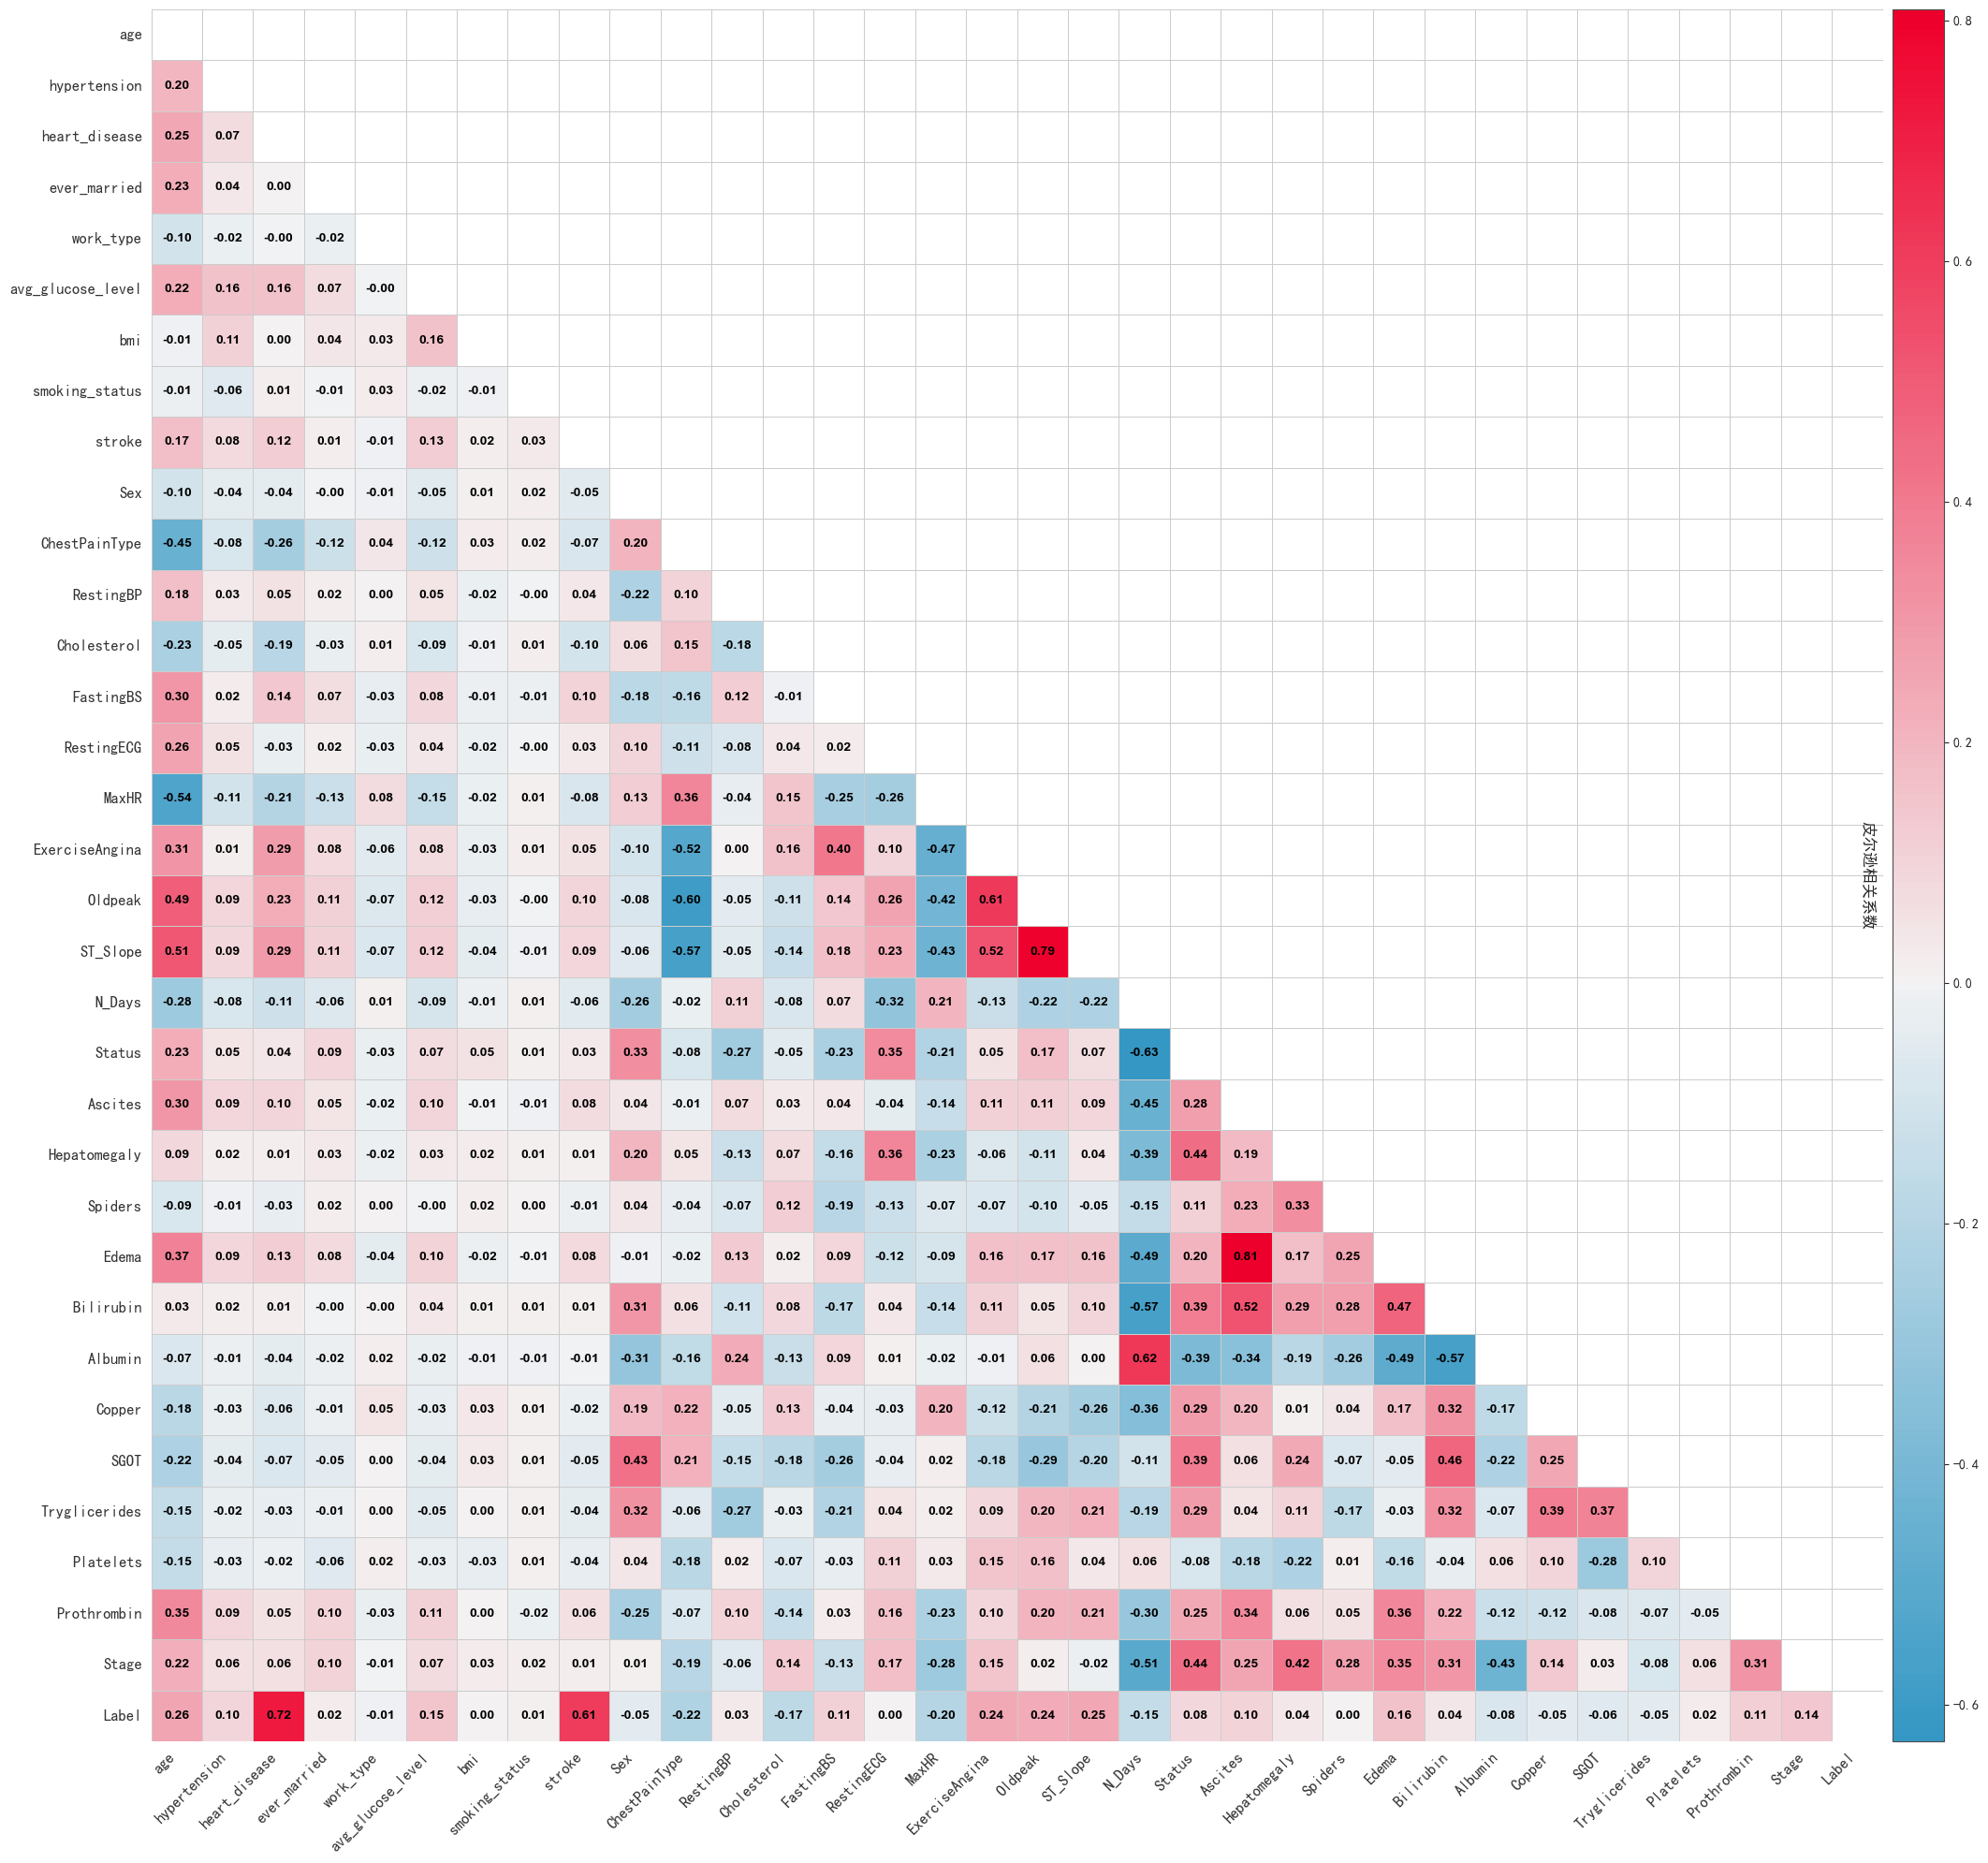

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib import font_manager
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline

# 方法1：直接指定系统字体路径（Windows示例）
font_path = 'C:/Windows/Fonts/simhei.ttf'  # 黑体路径
# 或使用宋体：'C:/Windows/Fonts/simsun.ttc'

# 方法2：动态检测可用中文字体（跨平台兼容）
system_fonts = [f.name for f in font_manager.fontManager.ttflist]
chinese_fonts = ['SimHei', 'Microsoft YaHei', 'SimSun', 'STKaiti']
available_fonts = [f for f in chinese_fonts if f in system_fonts]

# 创建字体属性对象
if available_fonts:
    zh_font = font_manager.FontProperties(fname=font_path if 'simhei' in font_path.lower() else None,
                                        family=available_fonts[0])
else:
    zh_font = font_manager.FontProperties(family='sans-serif')

# 计算相关度矩阵
correlation_matrix = data.corr()

# 设置图形风格
sns.set_style("white", {
    'axes.edgecolor': '0.3',
    'grid.color': '0.9'
})

# 创建图形
plt.figure(figsize=(24, 20))

# 创建上三角遮罩
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# 使用极限鲜艳红蓝渐变
cmap = sns.diverging_palette(240, 10, s=100, l=50, sep=1, as_cmap=True)

# 绘制热力图（先不显示默认颜色条）
ax = sns.heatmap(
    correlation_matrix,
    mask=mask,
    annot=True,
    fmt=".2f",
    cmap=cmap,
    center=0,
    square=True,
    linewidths=0.5,
    linecolor='0.8',
    cbar=False,  # 禁用默认颜色条
    annot_kws={
        "color": "black",
        "fontsize": 10,
        "fontweight": "bold"
    }
)

# 创建与主图高度一致的颜色条
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%", pad=0.1)
cbar = plt.colorbar(ax.collections[0], cax=cax)

# 设置颜色条标签
cbar.set_label("皮尔逊相关系数", fontproperties=zh_font, labelpad=18)
cbar.ax.yaxis.set_label_position('left')
cbar.ax.yaxis.label.set_fontproperties(zh_font)
cbar.ax.yaxis.label.set_size(12)
cbar.ax.yaxis.label.set_rotation(270)
cbar.ax.yaxis.label.set_verticalalignment('center')
cbar.ax.yaxis.label.set_horizontalalignment('center')

# 设置颜色条刻度标签
for label in cbar.ax.get_yticklabels():
    label.set_fontproperties(zh_font)
    label.set_fontsize(10)

# 网格线封闭
ax.axvline(x=len(correlation_matrix), color='0.3', linewidth=0.5)

# 标签设置（统一应用字体）
for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontproperties(zh_font)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    ha='right',
    fontsize=12,
    color='0.2'
)
ax.set_yticklabels(
    ax.get_yticklabels(),
    rotation=0,
    fontsize=12,
    color='0.2'
)

# 输出
plt.tight_layout(rect=[0, 0, 0.98, 1])
plt.savefig("q3_heatmap.png", dpi=720)
plt.show()

In [55]:
data2 = data.drop(['heart_disease',
                  'bmi','RestingECG',
                  'Spiders','smoking_status','State',
                  'avg_glucose_level',
                  'work_type',
                  'ever_married',
                  'RestingBP',
                  'Bilirubin',
                  'Platelets',
                  'stroke'],axis = 1,inplace = False,errors='ignore')
data2.head()

,age,hypertension,Sex,ChestPainType,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,...,Ascites,Hepatomegaly,Edema,Albumin,Copper,SGOT,Tryglicerides,Prothrombin,Stage,Label
0,67,0,0,3,0,0,125,0,0.0,1,...,0.0,2.0,0,3.1,94.0,56.76,124.702128,11.0,4.0,1
1,67,0,0,3,0,0,125,0,0.0,1,...,0.0,2.0,0,3.1,94.0,56.76,124.702128,11.0,4.0,1
2,67,1,0,3,0,0,125,0,0.0,1,...,0.0,2.0,0,3.1,94.0,56.76,124.702128,11.0,4.0,1
3,67,0,0,3,0,0,125,0,0.0,1,...,0.0,2.0,0,3.1,94.0,56.76,124.702128,11.0,4.0,1
4,67,0,0,3,0,0,125,0,0.0,1,...,0.0,2.0,0,3.1,94.0,56.76,124.702128,11.0,4.0,1


In [56]:
data2.to_csv('preparations/Q3_data2.csv',index=False)